<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Project_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **👨‍💻AI/ML Salaries Prediction using Plotly and Deep Learning🧠**


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
from sklearn.linear_model import LassoCV
import prince
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from keras.utils import plot_model

In [25]:
df=pd.read_csv('/content/salaries.csv')
df.head()

work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_size  
0               AU            S  
1               AU            S  
2               US            M  
3               US            M  
4               US            M

## **01. Descriptive Analysis**

In [26]:
df.shape

(16494, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [28]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  149713.575725     32.044986
std        0.713405  3.406017e+05   68516.136918     46.260201
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.020000e+05  101517.500000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.873422e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

In [29]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
df.duplicated().sum()

6401

In [32]:
df.nunique().to_frame(name='# of Unique Values')


# of Unique Values
work_year                            5
experience_level                     4
employment_type                      4
job_title                          155
salary                            2552
salary_currency                     23
salary_in_usd                     2931
employee_residence                  88
remote_ratio                         3
company_location                    77
company_size                         3

from matplotlib import pyplot as plt
_df_2['# of Unique Values'].plot(kind='hist', bins=20, title='# of Unique Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['# of Unique Values'].plot(kind='line', figsize=(8, 4), title='# of Unique Values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
df_v1 = df.drop(columns=['salary', 'salary_currency'], axis=1)
df_v1.rename(columns={'salary_in_usd': 'salary'}, inplace=True)
df_v1.shape

(16494, 9)

## **02. Exploratory Data Analysis using Plotly**

In [34]:
df_viz = df_v1.copy()
df_viz.shape

(16494, 9)

### **01) Salary Trend - Line Chart**
- work_year: The year in which the salary data was collected (e.g., 2024).
- salary_in_usd: The salary amount converted to US Dollars.

In [35]:
df_viz_salary = df_viz.groupby('work_year')['salary'].mean().reset_index()
df_viz_salary['salary'] = df_viz_salary['salary'].round(2)
df_viz_salary

work_year     salary
0       2020  102250.87
1       2021   99922.07
2       2022  134349.50
3       2023  153732.66
4       2024  150643.25

from matplotlib import pyplot as plt
df_viz_salary['work_year'].plot(kind='hist', bins=20, title='work_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_viz_salary['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_viz_salary.plot(kind='scatter', x='work_year', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['work_year']
  ys = series['salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_viz_salary.sort_values('work_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('work_year')
_ = plt.ylabel('salary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['work_year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'work_year'}, axis=1)
              .sort_values('work_year', ascending=True))
  xs = counted['work_year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_viz_salary.sort_values('work_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('work_year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_viz_salary['work_year'].plot(kind='line', figsize=(8, 4), title='work_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_viz_salary['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
df_viz_emp_type = df_viz.groupby('employment_type')['salary'].mean().reset_index()
df_viz_emp_type['salary'] = df_viz_emp_type['salary'].round(2)
df_viz_emp_type


employment_type     salary
0              CT  112578.39
1              FL   49220.86
2              FT  150015.35
3              PT   83750.16

In [37]:
fig = px.line(df_viz_salary, x='work_year', y='salary', line_shape='spline')
fig.update_traces(line=dict(width=4, color='Teal'), mode='lines+markers')
fig.update_traces(marker=dict(size=12))
fig.update_layout(
    title={
        'text': "Salary Trends Over Time", 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': "Arial, sans-serif", 'size': 24}
    }
)
fig.show()

In [39]:
fig = px.line(df_viz_emp_type, x='employment_type', y='salary', line_shape='spline')
fig.update_traces(line=dict(width=4, color='Teal'), mode='lines+markers')
fig.update_traces(marker=dict(size=12))
fig.update_layout(
    title={
        'text': "Salary Trends Over Time", 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': "Arial, sans-serif", 'size': 24}
    }
)
fig.show()

### **The average salary of AI/ML positions increased rapidly from 2022 to 2023, but has lost momentum since then.**

#### **02) Salary by Experience Level, Employment Type, and Company Size - Bar Chart**
- experience_level: The level of experience of the employee (e.g., MI for Mid-Level).
- employment_type: The type of employment (e.g., FT for Full-Time).
- company_size: The size of the company (e.g., S for Small).
- salary_in_usd: The salary amount converted to US Dollars.

In [40]:
df_viz_level = df_viz.groupby('experience_level')['salary'].mean().reset_index()
df_viz_level['salary'] = df_viz_level['salary'].round(2)

# Employment Type
df_viz_emp_type = df_viz.groupby('employment_type')['salary'].mean().reset_index()
df_viz_emp_type['salary'] = df_viz_emp_type['salary'].round(2)

# Company Size
df_viz_size = df_viz.groupby('company_size')['salary'].mean().reset_index()
df_viz_size['salary'] = df_viz_size['salary'].round(2)

df_viz_level = df_viz_level.sort_values('salary', ascending=True)
df_viz_emp_type = df_viz_emp_type.sort_values('salary', ascending=True)
df_viz_size = df_viz_size.sort_values('salary', ascending=True)

In [41]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['Experience Level', 'Employment Type', 'Company Size'])

# Experience Level
fig.add_trace(go.Bar(x=df_viz_level['experience_level'], y=df_viz_level['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=1)

# Employment Type
fig.add_trace(go.Bar(x=df_viz_emp_type['employment_type'], y=df_viz_emp_type['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=2)

# Company Size
fig.add_trace(go.Bar(x=df_viz_size['company_size'], y=df_viz_size['salary'], marker_color=px.colors.sequential.Tealgrn), row=1, col=3)

fig.update_layout(
    title={
        'text': 'Average Salary', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)

fig.show()


# **03. Data Preprocessing**

In [42]:
df_v1.head()

work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  employee_residence  remote_ratio company_location company_size  
0                 AU             0               AU            S  
1                 AU             0               AU            S  
2                 US             0               US            M  
3                 US             0               US            M  
4                 US             0               US            M

### **01) Target Variable (Box-Cox Transformation) - salary**


**[01] Outliers & Distribution**

In [43]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Salary", "Box Plot of Salary"))

# Histogram
fig.add_trace(go.Histogram(x=df_v1['salary'], nbinsx=100), row=1, col=1)
# Box Plot
fig.add_trace(go.Box(x=df_v1['salary']), row=1, col=2)

fig.update_layout(
    title={
        'text': 'Distribution of Target Variable (Salary)', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)

fig.show()

### **01. The Distribution of Salary is right-skewed.**
### **02. The feature includes some outliers.**

First of all, I capped the values at 400K, so any values higher than 400K were adjusted to 400K.

- This adjustment affected 0.4% of the data.

In [44]:
print(round(df_v1[df_v1['salary'] > 400000].shape[0] / df_v1.shape[0], 4) * 100)

0.4


In [45]:
df_v2 = df_v1.copy()
df_v2['salary'] = df_v2['salary'].apply(lambda x: 400000 if x > 400000 else x)

In [46]:
# Log Transformation
df_v2['salary_log'] = np.log1p(df_v2['salary'])

# Box-Cox Transformation
df_v2['salary_boxcox'], lam = boxcox(df_v2['salary'])
print('Lambda:', lam)

Lambda: 0.4605750643245545


In [47]:
print("The Skewness of Salary (Original): ", round(df_v2['salary'].skew(), 2))
print("The Skewness of Salary (Log): ", round(df_v2['salary_log'].skew(), 2))
print("The Skewness of Salary (Box-Cox): ", round(df_v2['salary_boxcox'].skew(), 2))

The Skewness of Salary (Original):  0.74
The Skewness of Salary (Log):  -0.74
The Skewness of Salary (Box-Cox):  0.0


In [48]:
qq_salary = stats.probplot(df_v2['salary'], dist="norm")
qq_salary_log = stats.probplot(df_v2['salary_log'], dist="norm")
qq_salary_boxcox = stats.probplot(df_v2['salary_boxcox'], dist="norm")

# Subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("QQ Plot for Salary", "QQ Plot for Log(Salary)", "QQ Plot for Box-Cox(Salary)"))

# QQ Plot for Salary
fig.add_trace(go.Scatter(x=qq_salary[0][0], y=qq_salary[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=1)
fig.add_trace(go.Scatter(x=qq_salary[0][0], y=qq_salary[1][1] + qq_salary[1][0]*qq_salary[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=1)

# QQ Plot for Log(Salary)
fig.add_trace(go.Scatter(x=qq_salary_log[0][0], y=qq_salary_log[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=2)
fig.add_trace(go.Scatter(x=qq_salary_log[0][0], y=qq_salary_log[1][1] + qq_salary_log[1][0]*qq_salary_log[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=2)

# QQ Plot for Box-Cox(Salary)
fig.add_trace(go.Scatter(x=qq_salary_boxcox[0][0], y=qq_salary_boxcox[0][1], mode='markers', name='Observed Data', showlegend=False),
              row=1, col=3)
fig.add_trace(go.Scatter(x=qq_salary_boxcox[0][0], y=qq_salary_boxcox[1][1] + qq_salary_boxcox[1][0]*qq_salary_boxcox[0][0], mode='lines', name='Theoretical Line', showlegend=False),
              row=1, col=3)

fig.update_layout(
    title={
        'text': 'Comparison of QQ Plots for Salary, Log(Salary), Boxcox(Salary)', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)
fig.show()

In [49]:
df_v3 = df_v2.drop(columns=['salary_log'], axis=1)
df_v3.shape

(16494, 10)

**02) Ordinal Categorical Variables (Label Encoding) - Employment Type, Experience Level**

**Employment Type**

- FT: Full-Time (3)
- CT: Contract (2)
- PT: Part-Time (1)
- FL: Freelance (0)

In [50]:
# Employment Type
emp_type_dict = {'FT': 3, 'CT': 2, 'PT': 1, 'FL': 0}
df_v3['employment_type_label'] = df_v3['employment_type'].map(emp_type_dict)

**Experience Level**

- EX: Expert Level (3)
- SE: Senior Level (2)
- MI: Mid Level (1)
- EN: Entry Level (0)

In [51]:
# Experience Level
exp_level_dict = {'EX': 3, 'SE': 2, 'MI': 1, 'EN': 0}
df_v3['experience_level_label'] = df_v3['experience_level'].map(exp_level_dict)

In [52]:
df_v4 = df_v3.drop(columns=['employment_type', 'experience_level'], axis=1)
df_v4.shape

(16494, 10)

**03) Categorize - Job Title, Remote_Ratio**

**The "Job Title" is a nominal categorical variable, so I should use one-hot encoding.
However, there are 155 job titles in the "Job Title" column.
Performing one-hot encoding on it would cause the "Curse of Dimentionality."
To prevent this, I categorized the 155 positions into five broader categories.**

In [53]:
category_keywords = {
    'Data Scientist': ['Data Scientist', 'Data Science', 'ML', 'Machine Learning'],
    'Data Engineer': ['Data Engineer', 'ETL', 'Data Infrastructure'],
    'Data Analyst': ['Data Analyst', 'Analytics', 'BI ', 'Business Intelligence', 'Analysis'],
    'Software Engineer': ['Software Engineer', 'Developer'],
    'AI Engineer': ['AI Engineer', 'Deep Learning', 'NLP', 'Computer Vision', 'AI']
}

In [54]:
def categorize_job(job_title):
    for category, keywords in category_keywords.items():
        if any(keyword in job_title for keyword in keywords):
            return category
    return 'Others'

In [55]:
df_v4['job_category'] = df_v4['job_title'].apply(categorize_job)

**The "Remote_Ratio" is also a nominal categorical variable, but it's datatype is an "integer".
I changed the data type of this variable from integer to "string" to perform one-hot encoding on it later.**

In [56]:
df_v4['work_type'] = df_v4['remote_ratio'].map({0: 'Onsite', 100: 'Remote', 50: 'Hybrid'})

In [57]:
df_v5 = df_v4.drop(columns=['job_title', 'remote_ratio'], axis=1)
df_v5.shape

(16494, 10)

**04) Drop an useless column - Employee_Residence**

**The values in employee_residence match those in company_location 99.21%.
Therefore, I dropped the "employee_residence" variable.**

In [58]:
print(round(df_v5[df_v5['company_location'] != df_v5['employee_residence']].shape[0] / df_v5.shape[0], 4) * 100)

0.79


In [59]:
df_v6 = df_v5.drop(columns=['employee_residence'], axis=1)
df_v6.shape

(16494, 9)

**05) Nominal Categorical Variables (One-Hot Encoding) - work_year, company_size, company_location, job_category**

The other variables are all nominal variables, so I performed one-hot encoding on them.

In [60]:
df_v6['work_year'] = df_v6['work_year'].astype('str')

In [61]:
df_v7 = pd.get_dummies(df_v6, columns = ["work_year", "job_category", "work_type", "company_location", "company_size"])

In [62]:
df_v7.shape

(16494, 98)

## **04. Feature Selection**

**I used three techniques to perform "Feature Selection".**
01. Remove Constant features
02. ANOVA
03. Lasso

In [63]:
target_variable = 'salary_boxcox'
independent_variables = df_v7.drop(columns=['salary', 'salary_boxcox'], axis=1).columns.tolist()

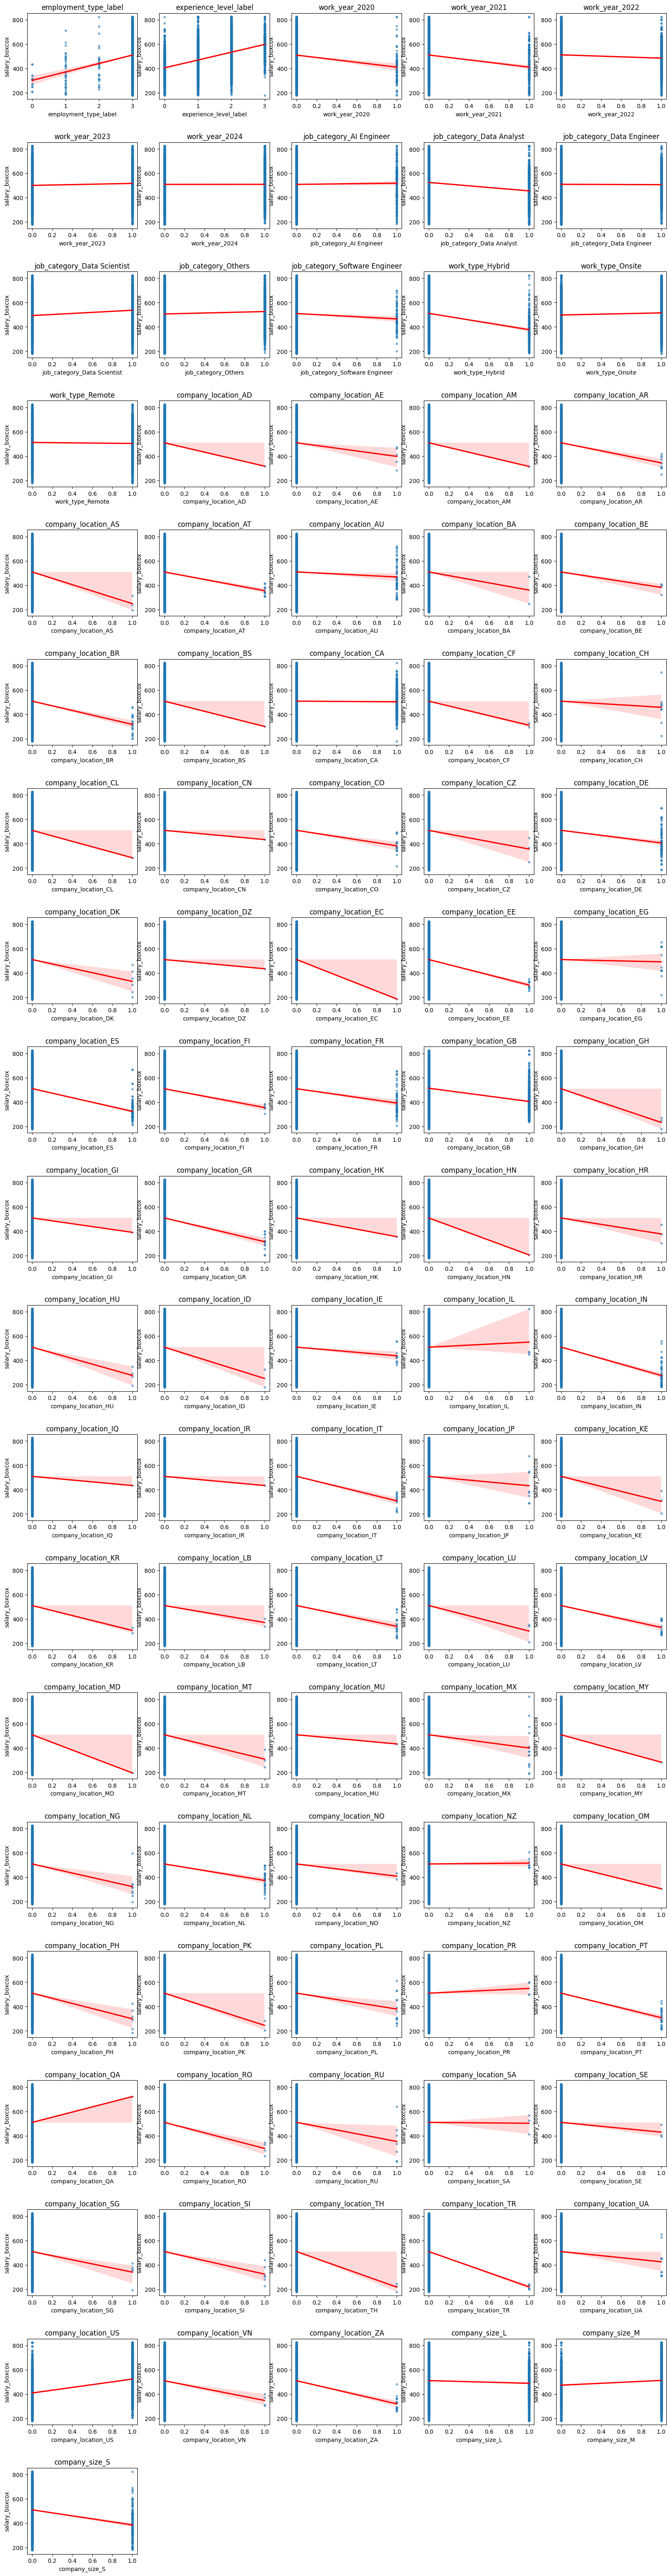

In [64]:
num_plots = len(independent_variables)
num_columns = 5
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

plt.figure(figsize=(20, 4 * num_rows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(independent_variables):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.regplot(x=col, y=target_variable, data=df_v7, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{col}')

plt.show()

**01) Remove constant features**

In [65]:
onehot_encoded = [col for col in df_v7.columns if col not in ["salary", "salary_boxcox", "employment_type_label", "experience_level_label"]]
print(len(onehot_encoded))

94


In [66]:
constant_columns_list = []
constant_columns_dict = {}

for col in onehot_encoded:
    if df_v7[col].sum() <=5:
        constant_columns_list.append(col)
        constant_columns_dict[col] = df_v7[col].sum()

In [67]:
print("The number of constant columns: ", len(constant_columns_list))
print(constant_columns_dict)

The number of constant columns:  42
{'company_location_AD': 1, 'company_location_AE': 5, 'company_location_AM': 1, 'company_location_AS': 3, 'company_location_BA': 2, 'company_location_BE': 4, 'company_location_BS': 1, 'company_location_CF': 2, 'company_location_CL': 1, 'company_location_CN': 1, 'company_location_CZ': 3, 'company_location_DZ': 1, 'company_location_EC': 1, 'company_location_GH': 3, 'company_location_GI': 1, 'company_location_HK': 1, 'company_location_HN': 1, 'company_location_HR': 3, 'company_location_HU': 4, 'company_location_ID': 2, 'company_location_IL': 4, 'company_location_IQ': 1, 'company_location_IR': 1, 'company_location_KE': 3, 'company_location_KR': 2, 'company_location_LB': 2, 'company_location_LU': 3, 'company_location_MD': 1, 'company_location_MT': 3, 'company_location_MU': 1, 'company_location_MY': 1, 'company_location_NO': 2, 'company_location_OM': 1, 'company_location_PK': 2, 'company_location_PR': 4, 'company_location_QA': 1, 'company_location_RO': 4, '

In [68]:
df_v8 = df_v7.drop(columns=constant_columns_list, axis=1)
df_v8.shape

(16494, 56)

### **02) ANOVA**

ANOVA (Analysis of Variance) is primarily useful when dealing with continuous dependent variables and categorical independent variables. Specifically, when you have a continuous target variable and categorical independent variables, ANOVA is beneficial for feature selection for the following reasons:

In [69]:
df_v8.columns = df_v8.columns.str.replace(' ', '')

In [70]:
X = df_v8.drop(columns=['salary', 'salary_boxcox'], axis=1)
y = df_v8['salary_boxcox']

significant_vars = []
insignificant_vars = []

In [71]:
for col in X.columns:
    formula = f'salary_boxcox ~ C({col})'
    model = ols(formula, df_v8).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    p_value = anova_results.iloc[0]['PR(>F)']

    if p_value < 0.05:
        significant_vars.append(col)
    else:
        insignificant_vars.append(col)

In [72]:
print("Insignificant Variables:", insignificant_vars)
print("The number of Insignificant Variables:", len(insignificant_vars))

Insignificant Variables: ['work_year_2024', 'job_category_AIEngineer', 'job_category_DataEngineer', 'company_location_CA', 'company_location_CH', 'company_location_EG', 'company_location_NZ']
The number of Insignificant Variables: 7


In [73]:
df_v9 = df_v8.drop(columns=insignificant_vars, axis=1)
df_v9.shape

(16494, 49)

### **03) LASSO Selection**

In [74]:
X_lasso = df_v9.drop(columns=['salary', 'salary_boxcox'], axis=1)
y_lasso = df_v9['salary_boxcox']

X_scaled = StandardScaler().fit_transform(X_lasso)

In [75]:
lasso_cv = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], max_iter=1000, cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06,
                0.1, 0.3, 0.6, 1],
        cv=5, random_state=42)

In [76]:
lasso_selected = X_lasso.columns[(lasso_cv.coef_ != 0).ravel()].tolist()
print("The number of selected features:", len(lasso_selected))
print("Selected Features:", lasso_selected)


The number of selected features: 45
Selected Features: ['employment_type_label', 'experience_level_label', 'work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023', 'job_category_DataAnalyst', 'job_category_DataScientist', 'job_category_Others', 'job_category_SoftwareEngineer', 'work_type_Hybrid', 'work_type_Onsite', 'company_location_AR', 'company_location_AT', 'company_location_AU', 'company_location_BR', 'company_location_CO', 'company_location_DE', 'company_location_DK', 'company_location_EE', 'company_location_ES', 'company_location_FI', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IE', 'company_location_IN', 'company_location_IT', 'company_location_JP', 'company_location_LT', 'company_location_LV', 'company_location_MX', 'company_location_NG', 'company_location_NL', 'company_location_PH', 'company_location_PL', 'company_location_PT', 'company_location_RU', 'company_location_SI', 'company_location_TR', 'company_location_UA', 

In [77]:
df_v10 = df_v9[lasso_selected + ['salary', 'salary_boxcox']]
df_v10.shape

(16494, 47)

### **05. Modeling**

#### **01) Preparation**

In [78]:
df_final = df_v10.copy()
df_final.shape

(16494, 47)

In [79]:
X = df_final.drop(columns=['salary', 'salary_boxcox'], axis=1)
y = df_final['salary_boxcox']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### **02) Deep Learning**

In [80]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [83]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

In [84]:
# Prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse Transformation
y_train_inv = inv_boxcox(y_train, lam)
y_test_inv = inv_boxcox(y_test, lam)
y_pred_train_inv = inv_boxcox(y_pred_train.ravel(), lam)
y_pred_test_inv = inv_boxcox(y_pred_test.ravel(), lam)

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [85]:
# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))

In [86]:
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 55020.92508985621
Test RMSE: 55798.62135813715


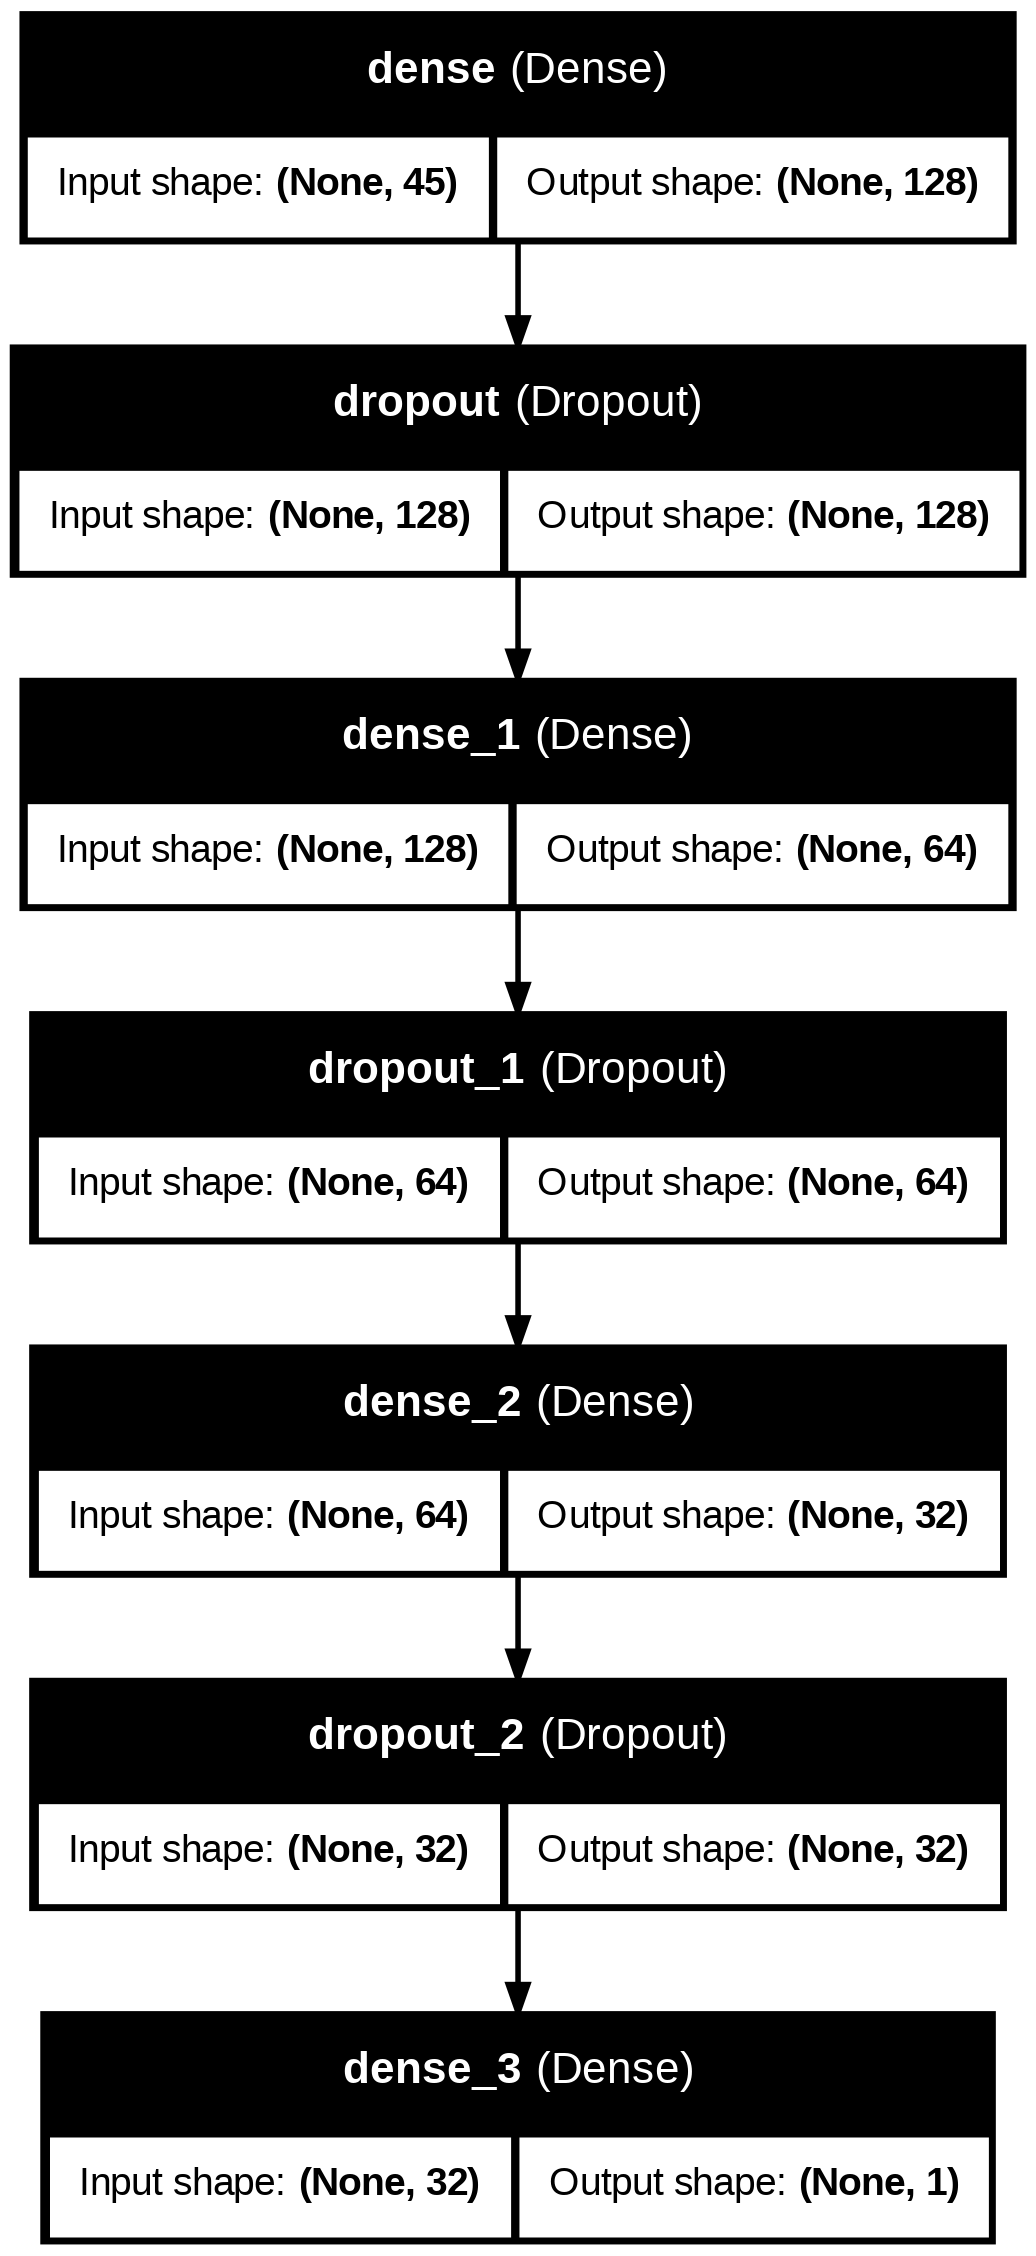

In [87]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)